In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

In [3]:
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y.columns = ['targets']

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


In [47]:
model = KMeans(n_clusters = 3)

In [48]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Original Classification

Text(0, 0.5, 'petal_width')

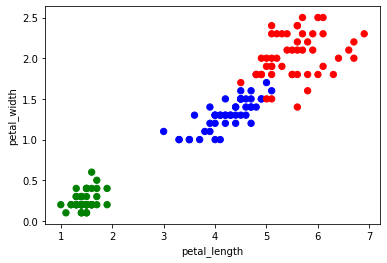

In [49]:
color = np.array(['green', 'blue', 'red'])
plt.scatter(X.petal_length, X.petal_width, c=color[y.targets], s=40)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Model Classification

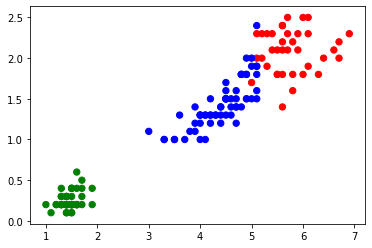

In [50]:
plt.scatter(X.petal_length, X.petal_width, c=color[model.labels_], s=40)


Accuracy

In [42]:
print("The accuracy of the model is : ")
sm.accuracy_score(y, model.labels_)

The accuracy of the model is : 


0.24

Confusion Matrix

In [11]:
print("The Confusion Matrix of the model is :")
sm.confusion_matrix(y, model.labels_)

The Confusion Matrix of the model is :


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

### EM Algorithm

In [85]:
modelG = GaussianMixture(n_components=3)

In [86]:
modelG.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [87]:
y_predict = modelG.predict(X)

Text(0, 0.5, 'petal_width')

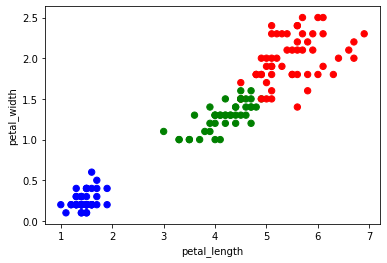

In [88]:
plt.scatter(X.petal_length, X.petal_width, c=color[y_predict], s=40)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [90]:
print("The accuracy of the model is : ")
sm.accuracy_score(y, y_predict)

The accuracy of the model is : 


0.3333333333333333

In [91]:
print("The confusion matrix of the model is : ")
sm.confusion_matrix(y, y_predict)

The confusion matrix of the model is : 


array([[ 0, 50,  0],
       [45,  0,  5],
       [ 0,  0, 50]], dtype=int64)